# Autoencoders


- Load and preprocess the MNIST dataset for training an autoencoder. 

- Construct a simple autoencoder model using the Keras functional API. 

- Train the autoencoder on the MNIST dataset. 

- Evaluate the performance of the trained autoencoder. 

- Fine-tune the autoencoder to improve its performance. 

- Use the autoencoder to denoise images. 

#### Step 1: Data Preprocessing

In [61]:
import numpy as np 
from tensorflow.keras.datasets import mnist
import tensorflow as tf


# Load the dataset
# (x_train, _), (x_test, _) = mnist.load_data()
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()


# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train)


[[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
 [0.6039216  0.69411767 0.73333335 ... 0.56078434 0.52156866 0.5647059 ]
 [1.         1.         1.         ... 0.3137255  0.3372549  0.32941177]
 ...
 [0.13725491 0.69803923 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.7411765  0.827451   0.9411765  ... 0.7647059  0.74509805 0.67058825]
 [0.8980392  0.8980392  0.9372549  ... 0.6392157  0.6392157  0.6313726 ]]


In the code above: 

- Use Keras to load the MNIST dataset.

- Normalize the image pixel values to the range (0, 1)

- Flatten the line 28x28 images to a 784-dimensional vector to reshape the data.

#### Step 2: Building the Autoencoder Model

This involves building an autoencoder with encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 

In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Encoder - Compresses the input data into a smaller representation
input_layer = Input(shape=(3072, ))
encoded_0 = Dense(1536, activation='relu')(input_layer)
encoded_1 = Dense(768, activation='relu')(encoded_0)
encoded_2 = Dense(384, activation='relu')(encoded_1)

# Bottleneck - The compressed representation that contains the most important features.
bottleneck = Dense(192, activation='relu')(encoded_2)

# Decoder - Reconstructs the input data from the compressed representation
decoded_0 = Dense(384, activation='relu')(bottleneck)
decoded_1 = Dense(768, activation='relu')(decoded_0)
decoded_2 = Dense(1536, activation='relu')(decoded_1)
output_layer = Dense(3072, activation='sigmoid')(decoded_2)

# Autoencoder model 
autoencoder = Model(input_layer, output_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model
autoencoder.compile(optimizer=optimizer, loss='mse')

# Summary of the model
autoencoder.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1536)           │     4,720,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 768)            │     1,180,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 384)            │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 192)            │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 384)            │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 768)            │       295,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1536)           │     1,181,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3072)           │     4,721,664 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,542,400 (47.85 MB)

 Trainable params: 12,542,400 (47.85 MB)

 Non-trainable params: 0 (0.00 B)

In the code above: 
1. Define the Encoder
    - Create an input later with 784 neurons.
    - Add a Dense layer with 64 neurons and ReLU activation. 

2. Define the Bottleneck:
    - Add a Dense layer with 32 neurons and ReLU activation. 

3. Define the Decoder: 
    - Add a Dense layer woth 64 neurons and ReLU activation. 
    - Add an output later with 784 neurons and sigmoid activation. 

4. Compile the Model:
    - Use the Adam optimizer and binary crossentropy loss.

Explanation by ChatGPT: 

🔑 What Happens

1. Input
 - You start with 784 values (flattened 28×28 pixels).

2. Encoder
 - First Dense(64) shrinks 784 → 64.
 - Then Dense(32) shrinks further → 32.
 - This 32-dimensional vector is the bottleneck (compressed code).
 - It cannot carry all 784 pixel values directly, so the network learns to keep only the most informative structure (edges, strokes, shapes).

3. Decoder
 - The model tries to reconstruct 784 values back from just 32.
 - Because information was “squeezed” through 32 numbers, some detail is lost — the reconstruction is an approximation.

🎯 Why This Leads to Reduction
 - If the network could just memorize the input, it wouldn’t compress anything.
 - By forcing the middle layer to be smaller than the input, you prevent trivial copying.
 - This bottleneck acts like a funnel → the model must learn compact representations (think: a digit summarized by “loop here, stroke there” instead of every pixel).

 ✅ Key Point
 - The “reduction” you’re noticing is dimensionality reduction:
        784-dimensional input → compressed into 32 dimensions → expanded back.
 - That 32-dim code is a lower-dimensional embedding of the original input.

#### Step 3: Training the Autoencoder Model

In [27]:
autoencoder.fit(
    x_train, 
    x_train, 
    epochs=25,
    batch_size=256, 
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0128 - val_loss: 0.0133
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 4/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 5/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0119 - val_loss: 0.0122
Epoch 6/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 7/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 8/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 9/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 10/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0112 - val_loss: 0.0113
Epoch 11/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - loss: 0.0110 - val_loss: 0.0111
Epoch 12/25
196/196

#### Step 4: Evaluating the Autoencoder

We will evaluate the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


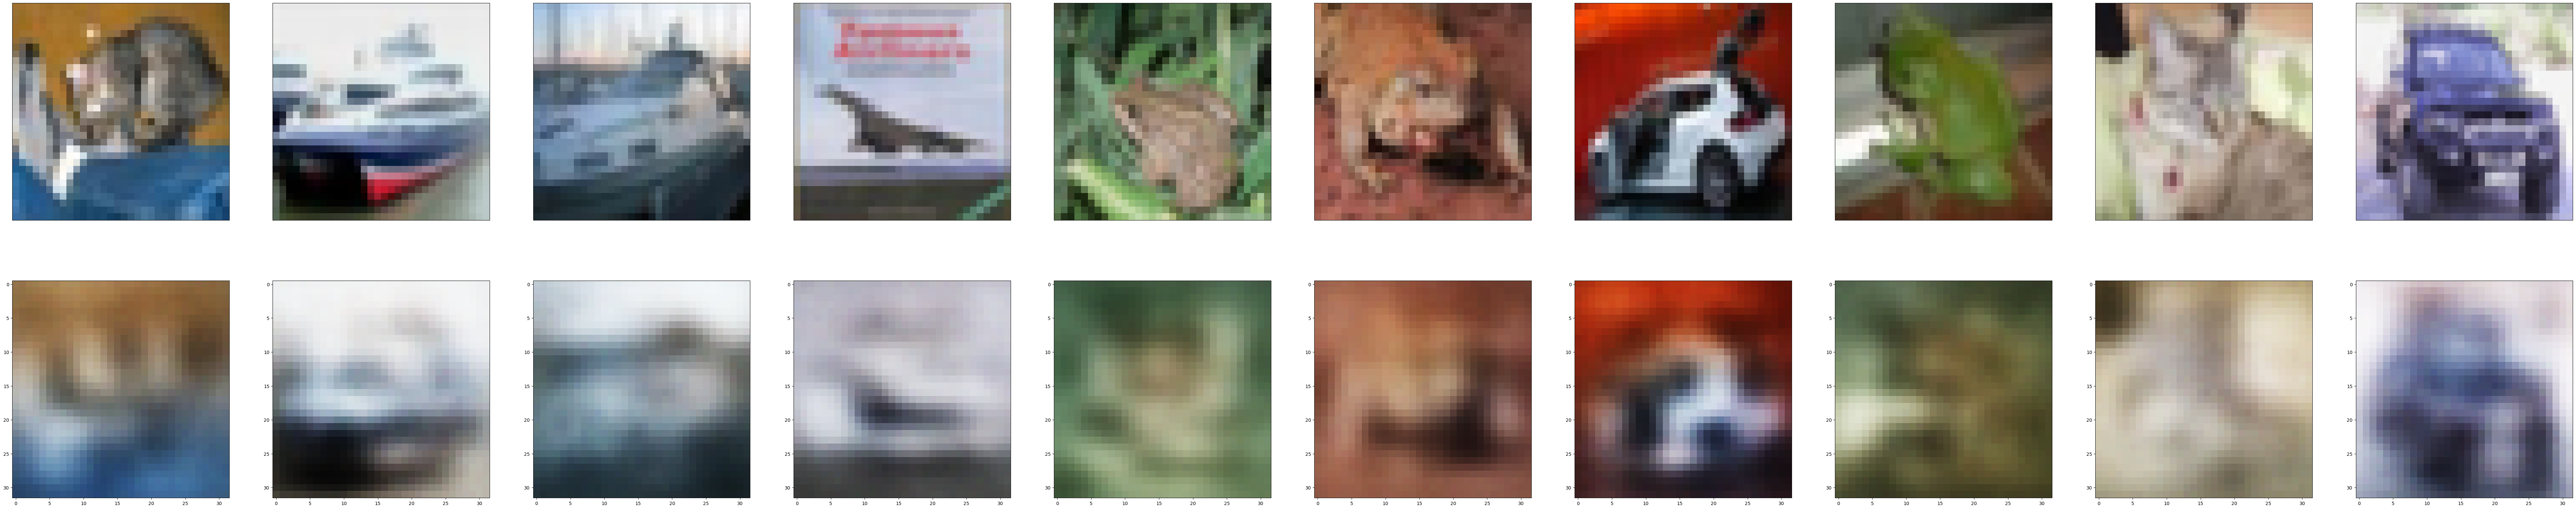

In [28]:
import matplotlib.pyplot as plt

# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize the results
n = 10
plt.figure(figsize=(100, 20))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    a = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code:
1. Reconstructed Images:
  - Use the autoencoder to predict the test data. 
  - Compare the original test images with the reconstructed images. 

2. Visualize the Results 
  - Plot a few examples of original and reconstructed images side by side. 

Although the reconstructed images are blurry, the accuracy was high. Meaning we may not be able to see the images clearly, but these models have no problem classifying each of these.

In [50]:
Compression_ratio = 3072/192
print(Compression_ratio, "to 1.")

16.0 to 1.


I have tried to create another model with CNN (VGG and my own) but I couldn't seem to create a good model that would outperform this one (maybe I didn't have the patience to let it train as some of them did take a long time). Regardless, let us take note of this finding and move on.

#### Step 6: Denoising Images with Autoencoder

Here, we add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, 
    x_train, 
    epochs=25,
    batch_size=256, 
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - loss: 0.0167 - val_loss: 0.0226
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - loss: 0.0162 - val_loss: 0.0228
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0160 - val_loss: 0.0232
Epoch 4/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0158 - val_loss: 0.0239
Epoch 5/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - loss: 0.0156 - val_loss: 0.0229
Epoch 6/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0155 - val_loss: 0.0230
Epoch 7/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 0.0153 - val_loss: 0.0224
Epoch 8/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - loss: 0.0151 - val_loss: 0.0227
Epoch 9/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - loss: 0.0151 - val_loss: 0.0222
Epoch 10/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - loss: 0.0149 - val_loss: 0.0223
Epoch 11/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - loss: 0.0150 - val_loss: 0.0229
Epoch 12/25
196/196

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


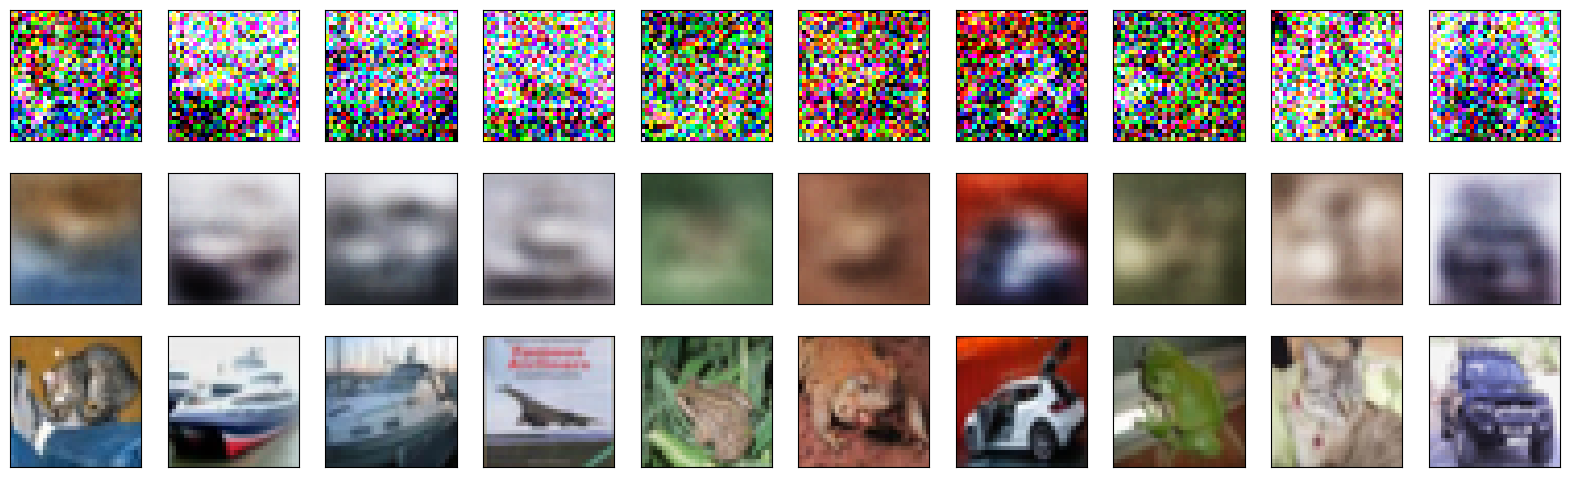

In [66]:

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results. 
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(32,32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(32,32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(32,32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In the above code:

1. Add noise to the data:
 - Add random noise to the training and test data.
 - Train the Autoencoder with noisy data: 
    - Train the autoencoder using the noisy images as input and the original images

2. Evaluate the denoising performance:
 - Use the autoencoder to denoise the test images.
 - Compare the noisy, denoised, original images.